# CZ4042 Neural Networks & Deep Learning: Assignment 1 
## PART A: Classification Problem 

---

**Name:** Datta Anusha 

**Matricultation Number:** U1822948G

**Email:** anusha007@e.ntu.edu.sg

---

**AIM:** Build a Neural Network to classify the GTZAN Dataset - predict genre label of audio file

**GTZAN Dataset**

*   features_30_sec.csv
*   1000 audio tracks, 30 seconds each
*   Audio tracks preprocessed into 57 features
*   Genres (10 labels): blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae and rock
*   1 pattern: filename + audio length + 57 features + label/genre





In [1]:
SEED= 10

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [2]:
import pandas as pd
import time

# tensorflow libraries
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import statistics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df.shape

(1000, 60)

In [5]:
df['label'].value_counts()

rock         100
hiphop       100
reggae       100
disco        100
jazz         100
blues        100
metal        100
country      100
pop          100
classical    100
Name: label, dtype: int64

In [6]:
# Define CallBack functions

# Compute Training time for 1 Batch   
class batch_time(Callback):
    def on_train_begin(self, logs={}):
        self.times=[]
    def on_train_batch_begin(self, batch, logs={}):
        self.starttime = time.time()
    def on_train_batch_end(self, batch, logs={}):
        self.times.append(time.time()-self.starttime)

# Compute Training time for 1 Epoch  
class epoch_time(Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

### **QUESTION 1:**

Divide the dataset into a 70:30 ratio for training and testing. Use appropriate scaling of input features. We solely assume that there are only two datasets here: training & test. We would look into validation in Question 2 onwards.

In [7]:
columns_to_drop = ['label','filename', 'length']

# Helper function to split dataset into test and train
def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # Split data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    # Scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [8]:
# Split train 70% and test 30%
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


Design a feedforward deep neural network (DNN) which consists of an input layer, one hidden layer of 16 neurons with ReLU activation function, and an output softmax layer. Use an stochastic gradient descent with ‘adam’ optimizer with default parameters, and batch size = 1. Apply dropout of probability 0.3 to the hidden layer.

a) Use the training dataset to train the model for 50 epochs. Note: Use 50
epochs for subsequent experiments.

In [9]:
# Define Model Parameters

epochs = 50
batch_size = 1 # SGD

# CallBack Function
cb = batch_time()

print("Model Parameters set")

Model Parameters set


In [10]:
# Create Model 
model = Sequential([
  Dense(16, activation='relu'),
  Dropout(rate=0.3),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[cb], 
                    validation_data=(X_test, y_test))

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.2965 - accuracy: 0.1943 - val_loss: 1.7934 - val_accuracy: 0.3500
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.7525 - accuracy: 0.3500 - val_loss: 1.5462 - val_accuracy: 0.4500
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.5396 - accuracy: 0.4329 - val_loss: 1.3930 - val_accuracy: 0.4933
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4453 - accuracy: 0.4729 - val_loss: 1.3229 - val_accuracy: 0.5733
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2883 - accuracy: 0.5271 - val_loss: 1.2474 - val_accuracy: 0.5933
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2567 - accuracy: 0.5329 - val_loss: 1.1991 - val_accuracy: 0.5733
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1494 - accuracy: 0.5829 - val_loss: 1.1577 - val_accuracy: 0.6233
Epoch 

b) Plot accuracies on training and test data against training epochs and
comment on the plots.

**Comments**

As may be observed from the plot below, the Test and Train accuracies gradually improve over the course of the epochs. 

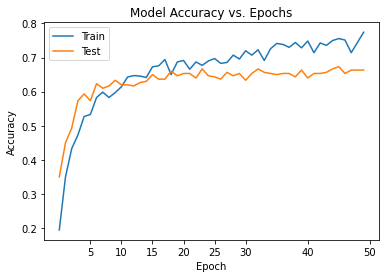

In [12]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epochs')
print()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 40, 50])
plt.legend(['Train', 'Test'], loc='upper left')

c) Plot the losses on training and test data against training epochs. State the approximate number of epochs where the test error begins to converge.

**Comments**

As may be observed from the plot below, the Test and Train loss gradually decreases over the course of the epochs. 

Train error seems to converge after 40 epochs. Test error seems to converge after only 10 epochs. Also, Train error is much lower than Test error, which may indicate overfitting.

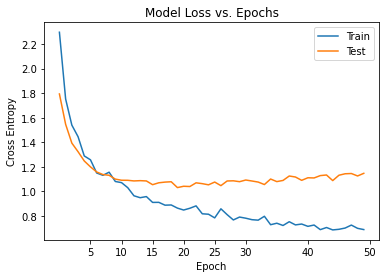

In [13]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs. Epochs')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 40, 50])
plt.legend(['Train', 'Test'], loc='upper right')

In [14]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)
print("Test Loss:",test_loss)
print("\nTest Accuracy:",test_acc*100)

3/3 [==============================] - 0s 5ms/step - loss: 1.1466 - accuracy: 0.6633
Test Loss: 1.1465957164764404

Test Accuracy: 66.33333563804626


### **QUESTION 2:**

In this question, we will compare the performance of the model using stochastic gradient descent and mini-batch gradient descent, as well as determining the optimal batch size for mini-batch gradient descent. Find the optimal batch size for mini-batch gradient descent by training the neural network and evaluating the performances for different batch sizes. Note: Use 3-fold cross-validation on training partition to perform parameter selection.

Summary:

*   Stochastic GD vs. Mini Batch GD
*   Find Optimal Batch Size (for mini batch GD) by training NN for different batches
*   Use 3-fold Cross Validation for parameter selection 

In [15]:
columns_to_drop = ['label','filename', 'length']

# Helper function to split dataframe into X and Y 
def prepare_dataset_2(df, columns_to_drop, random_state):

    # Encode the labels from 0 to n_classes-1
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])

    # scale the training inputs
    x = df.drop(columns_to_drop,axis=1)
    y = df['label'].to_numpy()
    standard_scaler = preprocessing.StandardScaler()
    x_scaled= standard_scaler.fit_transform(x)

    return x_scaled, y

In [16]:
def cross_validation_batch_size(batch_size, no_of_neurons):
  # Split dataframe into X,Y
  X,Y = prepare_dataset_2(df, columns_to_drop, random_state=0)

  # Shuffle and find folds
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  
  X, Y = X[indices], Y[indices]
  no_of_folds = len(X)//folds

  print("len(X):", len(X))
  print("Number of folds:", no_of_folds)

  accuracy_n = []
  accuracy_batch = []

  # Iterate and train model for all folds 
  for fold in range(folds):

      # Set up data for Fold
      start, end = fold*no_of_folds, (fold+1)*no_of_folds
      x_test, y_test = X[start:end], Y[start:end]
      x_train  = np.append(X[:start], X[end:], axis=0)
      y_train = np.append(Y[:start], Y[end:], axis=0) 

      # Create model
      model = Sequential([
          Dense(no_of_neurons, activation='relu'),
          Dropout(0.3),
          Dense(10, activation='softmax')
      ])
      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      # Callback function for time
      tb = batch_time()
      te = epoch_time()

      # Train Model
      history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=num_epochs,
                      verbose=2,
                      use_multiprocessing=True,
                      callbacks = [tb, te],
                      validation_data=(x_test, y_test))
  
  # Batch Accuracies for all epochs
  for i in range(num_epochs):
      accuracy_n.append(history.history['val_accuracy'][i])

  # Batch Accuracies for last epochs
  accuracy_batch.append(history.history['val_accuracy'][num_epochs-1])

  result = [
        # Compute median over all folds of all epochs for a given batch size
        statistics.median(tb.times), 
        statistics.median(te.times),
        np.mean(accuracy_batch),
        accuracy_n, 
      ]

  return result

In [17]:
# Define Parameters for 3-Fold Cross Validation
batch_sizes = [1, 4, 8, 16, 32, 64]
folds = 3
num_epochs = 50

time_batch=[]
time_epoch=[]
batch_acc=[]
accuracy = []

for size in batch_sizes:
    results = cross_validation_batch_size(size,16)
    time_batch.append(results[0])
    time_epoch.append(results[1])
    batch_acc.append(results[2])    
    accuracy.append(results[3])

len(X): 1000
Number of folds: 333
Epoch 1/50
667/667 - 2s - loss: 2.2366 - accuracy: 0.2054 - val_loss: 1.8672 - val_accuracy: 0.3213
Epoch 2/50
667/667 - 1s - loss: 1.6712 - accuracy: 0.3943 - val_loss: 1.5730 - val_accuracy: 0.4625
Epoch 3/50
667/667 - 1s - loss: 1.4537 - accuracy: 0.4768 - val_loss: 1.4548 - val_accuracy: 0.4895
Epoch 4/50
667/667 - 1s - loss: 1.3192 - accuracy: 0.5292 - val_loss: 1.3631 - val_accuracy: 0.5375
Epoch 5/50
667/667 - 1s - loss: 1.2787 - accuracy: 0.5382 - val_loss: 1.3063 - val_accuracy: 0.5556
Epoch 6/50
667/667 - 1s - loss: 1.2026 - accuracy: 0.5622 - val_loss: 1.2619 - val_accuracy: 0.5616
Epoch 7/50
667/667 - 1s - loss: 1.1098 - accuracy: 0.5967 - val_loss: 1.2045 - val_accuracy: 0.5826
Epoch 8/50
667/667 - 1s - loss: 1.0517 - accuracy: 0.6132 - val_loss: 1.1630 - val_accuracy: 0.5946
Epoch 9/50
667/667 - 1s - loss: 1.0194 - accuracy: 0.6237 - val_loss: 1.1532 - val_accuracy: 0.6216
Epoch 10/50
667/667 - 1s - loss: 1.0145 - accuracy: 0.6207 - val_l

a) Plot mean cross-validation accuracies over the training epochs for different
batch sizes. Limit search space to batch sizes {1,4,8,16,32, 64}.

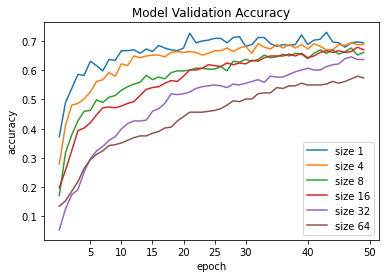

In [18]:
# Cross Validation Accuracy for different batch sizes {1,4,8,16,32, 64}
plt.figure(2)

for i in range(0,6):
  plt.plot(accuracy[i])

plt.title('Model Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 40, 50])
plt.legend(['size 1', 'size 4','size 8','size 16', 'size 32', 'size 64'], loc='lower right')

Text(0.5, 1.0, 'Mean Test Accuracy vs. Batch Size')

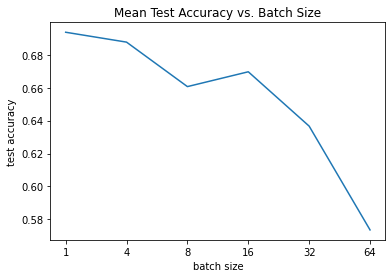

In [19]:
# Mean Cross Validation accuracy: Mean of all folds in one epoch -> mean of all epochs for given batch size
plt.figure(2)
plt.plot(range(len(batch_sizes)), batch_acc)
plt.xticks(range(len(batch_sizes)), batch_sizes)
plt.xlabel('batch size')
plt.ylabel('test accuracy')
plt.title('Mean Test Accuracy vs. Batch Size')

b) Create a table of median time taken to train the network for one epoch
against different batch sizes.
(Hint: Introduce a callback)

In [20]:
for i in range(len(batch_sizes)):
  print("Time to train one epoch for batch size " + str(batch_sizes[i])+ " : " + str(round(time_epoch[i], 4)) + "ms")

Time to train one epoch for batch size 1 : 1.021ms
Time to train one epoch for batch size 4 : 0.298ms
Time to train one epoch for batch size 8 : 0.1782ms
Time to train one epoch for batch size 16 : 0.0961ms
Time to train one epoch for batch size 32 : 0.0667ms
Time to train one epoch for batch size 64 : 0.0546ms


As observed from the results above, the time for an epoch decreases as the batch size increases - which is expected. 

c) Select the optimal batch size and state reasons for your selection.

**Optimal Batch Size:** 16

From the "Model Validation Accuracy" plot above (Q2-a), we observe that batch sizes 1, 4 and 16 result in the highest validation accuracies respectively.

However, the performances for these batches sizes is extremely close but the trade off in terms of training time per epoch is quite different. Batch size 1 is essentially Stochastic Gradient Descent, which is computationally very expensive - especially when there are other batch sizes with similar performances but more efficient training times.

Hence, we choose batch size 16 as it has high accuracy score comparable to batch sizes 1 and 4. Moreover, it is far more computationally efficient, makes the accuracy vs. time trade off a better choice. 

d) What is the difference between mini-batch gradient descent and stochastic
gradient descent and what does this mean for model training?

In **Stochastic Gradient Descent**, all data patterns are trained on individually one by one for every epoch. (Block size=1)

In **Mini-Batch SGD**, the data is divided into blocks and the gradients are evaluated on blocks in an epoch in random order. (1 < Block Size < # patterns)

* B = 1: Stochastic Gradient Descent
* B = P (size of training data): (batch) Gradient Descent
* 1 < B < P Mini-Batch Gradient Descent

In practice, gradient descent is performed on mini-batch updates of
gradients within a batch or block of data of size B. 

When B increases, more add-multiply operations per second, taking advantages of parallelism and matrix computations - this leads to decrease in training time. 

However, as B continues to increase, the number of computations per update (of weights, biases) increases - which eventually leads to increase in training time. 

Therefore, the curve of the training time for weight update against batch size usually take a U-shape curve. There exists an optimal value of B – that depends on the sizes of the caches as well.

e) Plot the train and test accuracies against epochs for the optimal batch size.

In [21]:
# Train on optimal batch size (16)

optimal_batch_size = 16
epochs = 50

model = Sequential([
  Dense(16, activation='relu'),
  Dropout(rate=0.3),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=optimal_batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 2.5784 - accuracy: 0.1014 - val_loss: 2.2927 - val_accuracy: 0.1467
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 2.2897 - accuracy: 0.1757 - val_loss: 2.1156 - val_accuracy: 0.2500
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 2.1604 - accuracy: 0.2114 - val_loss: 1.9986 - val_accuracy: 0.3000
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 2.0284 - accuracy: 0.2571 - val_loss: 1.8995 - val_accuracy: 0.3467
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 1.9658 - accuracy: 0.2929 - val_loss: 1.8178 - val_accuracy: 0.3767
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 1.8443 - accuracy: 0.3214 - val_loss: 1.7477 - val_accuracy: 0.4000
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 1.7836 - accuracy: 0.3514 - val_loss: 1.6896 - val_accuracy: 0.4100
Epoch 8/50
44/44 [==

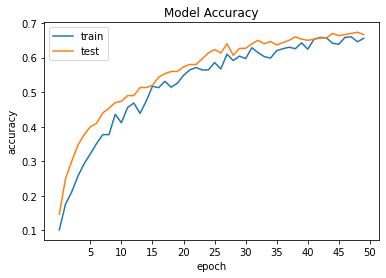

In [22]:
# Plot Test and Train Accuracy for batch size 16
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

### **QUESTION 3:**

Find the optimal number of hidden neurons for the 2-layer network (i.e., one hidden
layer) designed in Question 1 and 2.

In [23]:
def cross_validation_hidden_neurons(batch_size, no_of_neurons):

    # Split dataframe into X,Y
    X,Y = prepare_dataset_2(df, columns_to_drop, random_state=0)

    # Shuffle and find folds
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    X, Y = X[indices], Y[indices]
    no_of_folds = len(X)//folds

    print("len(X):", len(X))
    print("Number of folds:", no_of_folds)

    accuracy_n = []
    accuracy_batch = []

    # Iterate and train model for all folds 
    for fold in range(folds):

        # Set up data for Fold
        start, end = fold*no_of_folds, (fold+1)*no_of_folds
        x_test, y_test = X[start:end], Y[start:end]
        x_train  = np.append(X[:start], X[end:], axis=0)
        y_train = np.append(Y[:start], Y[end:], axis=0) 

        # Train Model
        model = Sequential([
            Dense(no_of_neurons, activation='relu'),
            Dropout(0.3),
            Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Callback function for time
        tb = batch_time()
        te = epoch_time()

        history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose=2,
                        use_multiprocessing=True,
                        callbacks = [tb, te],
                        validation_data=(x_test, y_test))
    
    # Batch Accuracies for all epochs
    for l in range(num_epochs):
        accuracy_n.append(history.history['val_accuracy'][l])

    # Batch Accuracies for last epochs
    accuracy_batch.append(history.history['val_accuracy'][num_epochs-1])

    
    results = [
              # Compute median over all folds of all epochs for a given batch size
              statistics.median(tb.times), 
              statistics.median(te.times),
              accuracy_n
            ]

    return results

In [24]:
# Define Parameters for 3-Fold Cross Validation
optimal_batch_size = 16 # use the optimal batch size from Q2
epochs = 50
hidden_units = [8, 16, 32, 64]

hidden_neuron_acc=[]
time_batch=[]
time_epoch=[]

for i in hidden_units:
    results = cross_validation_hidden_neurons(optimal_batch_size,i)
    time_batch.append(results[0])
    time_epoch.append(results[1])
    hidden_neuron_acc.append(results[2])

len(X): 1000
Number of folds: 333
Epoch 1/50
42/42 - 1s - loss: 2.6323 - accuracy: 0.1499 - val_loss: 2.3114 - val_accuracy: 0.1982
Epoch 2/50
42/42 - 0s - loss: 2.2965 - accuracy: 0.2024 - val_loss: 2.1436 - val_accuracy: 0.2523
Epoch 3/50
42/42 - 0s - loss: 2.1927 - accuracy: 0.2144 - val_loss: 2.0471 - val_accuracy: 0.2793
Epoch 4/50
42/42 - 0s - loss: 2.0844 - accuracy: 0.2489 - val_loss: 1.9845 - val_accuracy: 0.2823
Epoch 5/50
42/42 - 0s - loss: 2.0250 - accuracy: 0.2714 - val_loss: 1.9310 - val_accuracy: 0.3063
Epoch 6/50
42/42 - 0s - loss: 1.9892 - accuracy: 0.2639 - val_loss: 1.8826 - val_accuracy: 0.3153
Epoch 7/50
42/42 - 0s - loss: 1.9302 - accuracy: 0.2834 - val_loss: 1.8316 - val_accuracy: 0.3423
Epoch 8/50
42/42 - 0s - loss: 1.8901 - accuracy: 0.2894 - val_loss: 1.7932 - val_accuracy: 0.3664
Epoch 9/50
42/42 - 0s - loss: 1.8772 - accuracy: 0.3058 - val_loss: 1.7508 - val_accuracy: 0.3814
Epoch 10/50
42/42 - 0s - loss: 1.8266 - accuracy: 0.3253 - val_loss: 1.7124 - val_ac

a) Plot the cross-validation accuracies against training epochs for different
numbers of hidden-layer neurons. Limit the search space of the number of
neurons to {8, 16, 32, 64}.
Continue using 3-fold cross validation on training dataset.

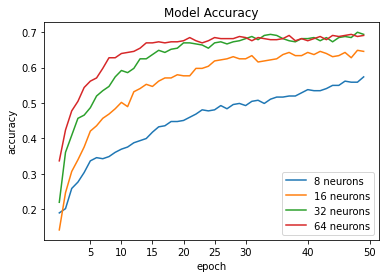

In [25]:
# Cross Validation Accuracy for different numbers of hidden layer neurons {8, 16, 32, 64}
plt.figure(1)

for i in range(0,4):
  plt.plot(hidden_neuron_acc[i])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 40, 50])
plt.legend(['8 neurons', '16 neurons','32 neurons','64 neurons'], loc='lower right')

b) Select the optimal number of neurons for the hidden layer. State the
rationale for your selection.

**Optimal Hidden Neurons:** 16

From the "Model Accuracy" plot above (Q3-a), we observe that hidden layer neurons 32, 64 and 16 result in the highest validation accuracies respectively.

The extremely high accuracy of 32 and 64 leads to the suspicison of overfitting. Hence, the idea of optimal hidden neurons was further explored by training individial models (not shown in this notebook) with these different hidden neurons. The model with 16 hidden neurons outperformed the models with 32 and 64 neurons. 

Hence, based on extensive analysis and experimentation, the optimal hidden neurons is 16 (despite performance being lower than 32 and 64 in graph above).

c) Plot the train and test accuracies against training epochs with the optimal
number of neurons.

In [26]:
# Train on optimal hidden neurons (16) 
optimal_batch_size = 16
optimal_neurons = 16
epochs = 50

model = Sequential([
  Dense(optimal_neurons, activation='relu'),
  Dropout(rate=0.3),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=optimal_batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 1s 5ms/step - loss: 2.5096 - accuracy: 0.1414 - val_loss: 2.2176 - val_accuracy: 0.1900
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 2.1679 - accuracy: 0.2171 - val_loss: 1.9912 - val_accuracy: 0.3133
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 1.9509 - accuracy: 0.2971 - val_loss: 1.8455 - val_accuracy: 0.3467
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 1.8635 - accuracy: 0.3086 - val_loss: 1.7389 - val_accuracy: 0.3667
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 1.7215 - accuracy: 0.3329 - val_loss: 1.6593 - val_accuracy: 0.4067
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 1.6437 - accuracy: 0.4229 - val_loss: 1.5991 - val_accuracy: 0.4467
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 1.5999 - accuracy: 0.4357 - val_loss: 1.5453 - val_accuracy: 0.4533
Epoch 8/50
44/44 [==

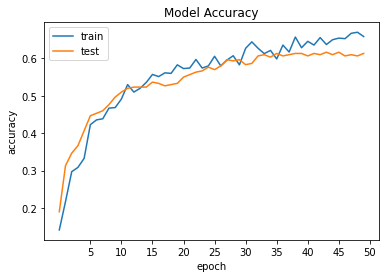

In [27]:
# Plot Test and Train Accuracy for hidden neurons 16

plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

d) What other parameters could possibly be tuned?

Some parameters that could be tuned are:

* learning rate
* batch size
* no of layers
* number of neurons, etc.

Every set of parameters of the network leads to a specific model.

### **QUESTION 4:** 

After you are done with the 2-layer network, design a 3-layer network with two hiddenlayers with ReLU activation, each consisting of the optimal number of neurons you obtained in Question 3, (apply a dropout with a probability of 0.3 for each hidden layer), and train it with a batch size of 1

In [28]:
batch_size = 1
optimal_hidden_neurons = 16
epochs = 50

model = Sequential([
  Dense(optimal_hidden_neurons, activation='relu'),
  Dropout(rate=0.3),
  Dense(optimal_hidden_neurons, activation='relu'),
  Dropout(rate=0.3),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/50
700/700 [==============================] - 2s 3ms/step - loss: 2.3067 - accuracy: 0.1657 - val_loss: 2.0451 - val_accuracy: 0.3233
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.9882 - accuracy: 0.3000 - val_loss: 1.7557 - val_accuracy: 0.3967
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.7856 - accuracy: 0.3400 - val_loss: 1.5595 - val_accuracy: 0.4533
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.6780 - accuracy: 0.3757 - val_loss: 1.4686 - val_accuracy: 0.4533
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.5430 - accuracy: 0.4357 - val_loss: 1.3794 - val_accuracy: 0.5000
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.5161 - accuracy: 0.4443 - val_loss: 1.3165 - val_accuracy: 0.5300
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4790 - accuracy: 0.4629 - val_loss: 1.2640 - val_accuracy: 0.5333
Epoch 

a) Plot the train and test accuracy of the 3-layer network against training
epochs.

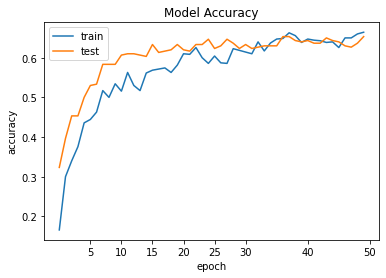

In [29]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 40, 50])
plt.legend(['train', 'test'], loc='upper left')

b) Compare and comment on the performances of the optimal 2-layer network
from your hyperparameter tuning in Question 2 and 3 and the 3-layer
network.

The accuracy performances of the 2-layer network (Q3-c) and 3-layer (Q4-a) network are quite similar, nearly 60%

However, in the case of the second network the minimal increase in accuracy does not justify the excessive use of an additional layer of neurons which increases the computational cost of the model. 

Hence, it can be concluded that the 2-layer network is better given the accuracy v/s computational trade off. 

### **QUESTION 5:**

a) Why do we add dropouts? Investigate the purpose of dropouts by removing
dropouts from your original 2-layer network (before changing the batch size
and number of neurons). Plot accuracies on training and test data with neural
network without dropout. Plot as well the losses on training and test data with
neural network without dropout.

* The key idea of ‘dropouts’ is to randomly drop neurons (along with their connections) from the networks during training. This prevents neurons from co-adapting and thereby reduces overfitting.
* Applying dropouts result in a ‘thinned network’ that consists of only neurons that survived. This minimizes the redundancy in the network.

In [30]:
# same code as 3 (c) remove drop out

batch_size = 1
neurons = 16
epochs = 50

model = Sequential([
  Dense(16, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))


Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.0176 - accuracy: 0.2814 - val_loss: 1.6884 - val_accuracy: 0.4167
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3870 - accuracy: 0.5157 - val_loss: 1.4275 - val_accuracy: 0.5033
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1582 - accuracy: 0.6071 - val_loss: 1.2764 - val_accuracy: 0.5567
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0018 - accuracy: 0.6686 - val_loss: 1.1895 - val_accuracy: 0.5800
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8919 - accuracy: 0.7043 - val_loss: 1.1377 - val_accuracy: 0.5967
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8010 - accuracy: 0.7343 - val_loss: 1.0997 - val_accuracy: 0.6233
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.7372 - accuracy: 0.7543 - val_loss: 1.0505 - val_accuracy: 0.6500
Epoch 

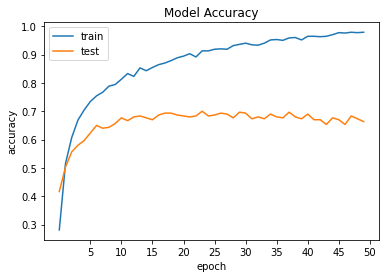

In [31]:
# Plot Training/Test accuracies

plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

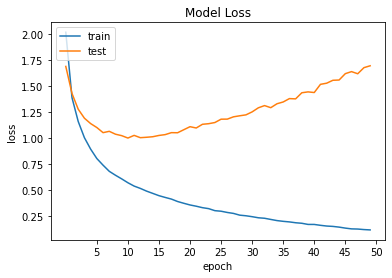

In [32]:
# Plot Training/Test Losses

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')

b) Explain the effect of removing dropouts.

The effect of removing dropouts is unfavourable, as it leads to overfitting. 

In the plots above, it is clearly observable that the model does not generalize well to produce correct predictions to new unseen patterns. It is very well suited for training data and has high accuracy for it, but cannot fit the test data and has low accuracy for it.

This can be prevented by adding dropouts in the hidden layers to produce a model with a good performance for both the train and test data.

c) What is another approach that you could take to address overfitting in the
model?

Some other methods to overcome overfitting:
* **Early stopping** - This is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. It stops the training of the model when validation error starts increasing. 
* **Weight regularization** - This is a regularization technique applied to the weights of a neural network, which encourages the network to keep the weights small and avoid overfitting

### **CONCLUSION**

* The current approach of using Feed-Forward Networks and Feature Engineering may pose certain limitations. It is possible that the feature engineering to process these files into the given 57 features, did not adequately capture all characteristics of the files for the model to train well on. The predictive performance of the model may be improved by using the original CNN/Audio files. 

* Parameter tuning is a powerful technique to boost the model accuracy and obtain optimal performance possible. In this case, parameter tuning of optimal batch had a more impactful result. Optimal batch is arguably an important parameter to tune as a very small batch size may lead to infeasible computational costs, and very large batch size may lead to insufficient updates in weights/biases resulting in poor model training. Further parameters such as activation function, learning rate etc can be tuned for better performance. 

* Instead of 3-fold cross validation, different validation techniques such as 3-way-split could also be considered. 

* An alternate approach to classify waveforms is by using a framework for Feature Extraction such as Wigner-Ville distribution (WVD), and a deep convolutional neural network (CNN) for image classification such as SqueezeNet. The Wigner-Ville distribution represents a time-frequency view of the original data that is useful for time varying signals. The high resolution and locality in both time and frequency provide good features for the identification of similar modulation types. While effective, this procedure can require extensive effort and domain knowledge to yield an accurate classification. 

* This methodology of modelling waveforms data plays an important role in many civil and military applications. An example is using seismic waveform classification to distinguish earthquake motion from human activities recorded by an accelerometer on site. 

### **ACKNOWLEDGEMENT** 

I wish to express my sincere gratitude towards Professor Jagath C. Rajapakse and our Teaching Assistants Charlene and Yihao, for providing us the opportunity to learn through practice by working on this project.

Also, thank you Charlene and Yihao for your time and patience in answering all my questions, and providing consistent guidance and support during the course of this project.